 Link : https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
#importing the necessary libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
#checking the first 5 rows of the dataset 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking the last 5 rows of the dataset 
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#Checking the shape of the dataset 
df.shape

(1599, 12)

In [6]:
# segrigating the rows and the columns.
print("Row:",df.shape[0])
print("Column:",df.shape[1])

Row: 1599
Column: 12


In [7]:
# check the Null count and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# to check the count of null values presrent in the pandas dataframe 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# there is no null value found in the given data set therefore we can process with the further steps.

In [10]:
#" To check the statistics of the dataframe. 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#To check for the columns in the dataframe.
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

The 'Quality' is the target variable and the rest of the variable are categorised as the independent variable.

In [12]:
#To write the columns into the list.
df.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [13]:
#Checking the data type. 
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
#There are two types of data present in the dataframe i.e "Float 64" and "Int64"

<AxesSubplot:>

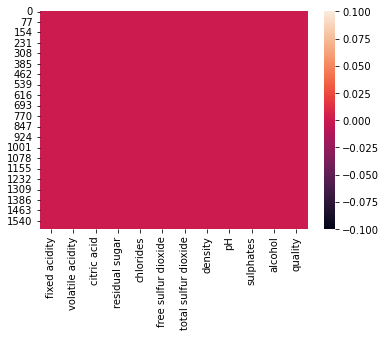

In [15]:
sns.heatmap(df.isnull())

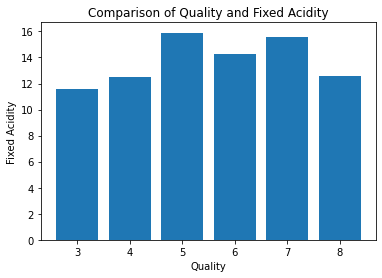

In [16]:
#Comparison of Quality and Fixed Acidity
plt.bar(df['quality'], df['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.title('Comparison of Quality and Fixed Acidity')
plt.show()

It is observed that the in some cases the quality of the wine improves with the increase in the fixed acidity.  

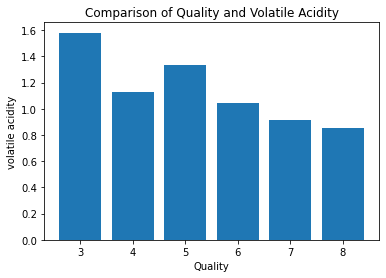

In [17]:
#Comparison between Quality and the Volatile Acidity  
plt.bar(df['quality'], df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.title('Comparison of Quality and Volatile Acidity')
plt.show()

It is observed that is most of the cases volatile acidity is inversely proportional to the quality of the wine.

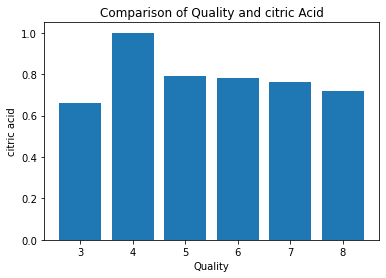

In [18]:
#Comparison between quality and the citric acid. 
plt.bar(df['quality'], df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('citric acid')
plt.title('Comparison of Quality and citric Acid')
plt.show()

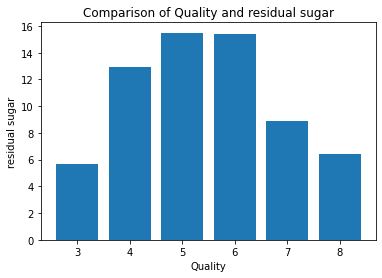

In [19]:
#Comparison between quality and the residual sugar. 
plt.bar(df['quality'], df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.title('Comparison of Quality and residual sugar')
plt.show()

The lower the residual sugar the quality of the wine is known to be of the better quality. 

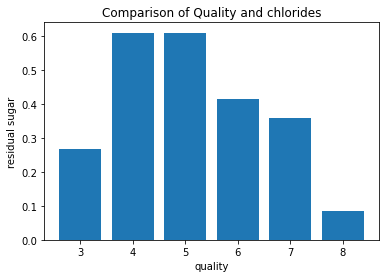

In [20]:
#Comparing the Chlorides and the quality. 
plt.bar(df['quality'], df['chlorides'])
plt.xlabel('quality')
plt.ylabel('residual sugar')
plt.title('Comparison of Quality and chlorides')
plt.show()

In [21]:
#Less the chlorides better the quality of wine

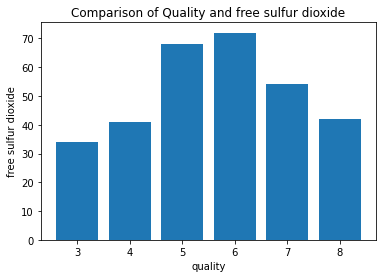

In [22]:
#Comparing the free sulfur dioxide and the quality of the wine.
plt.bar(df['quality'], df['free sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('free sulfur dioxide')
plt.title('Comparison of Quality and free sulfur dioxide')
plt.show()

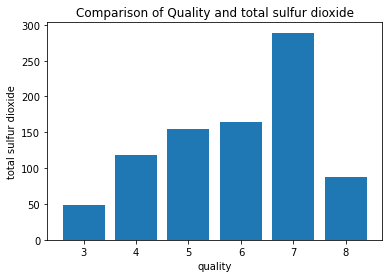

In [23]:
#comparing the total sulfur dioxide and the quality of the wine.
plt.bar(df['quality'], df['total sulfur dioxide'])
plt.xlabel('quality')
plt.ylabel('total sulfur dioxide')
plt.title('Comparison of Quality and total sulfur dioxide')
plt.show()

It doesnot have much corelation with the quality of the wine.

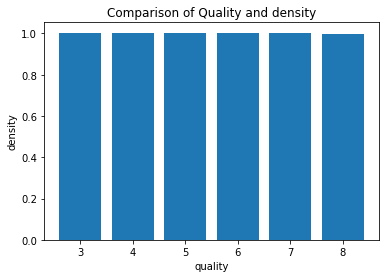

In [24]:
#comparing the density and the quality of the wine.
plt.bar(df['quality'], df['density'])
plt.xlabel('quality')
plt.ylabel('density')
plt.title('Comparison of Quality and density')
plt.show()

Higher the alcohal content better the quality.. 


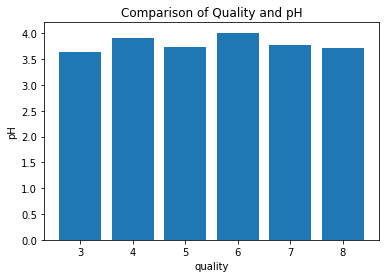

In [25]:
#comparing the density and the quality of the wine.
plt.bar(df['quality'], df['pH'])
plt.xlabel('quality')
plt.ylabel('pH')
plt.title('Comparison of Quality and pH')
plt.show()

better quality with high pH. 

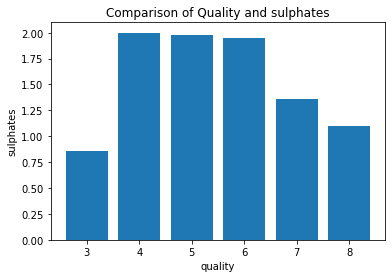

In [26]:
#comparing the sulphates and the quality of the wine.
plt.bar(df['quality'], df['sulphates'])
plt.xlabel('quality')
plt.ylabel('sulphates')
plt.title('Comparison of Quality and sulphates')
plt.show()

No signifcance

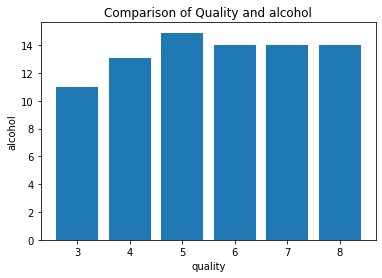

In [27]:
#comparing the sulphates and the quality of the wine.
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Comparison of Quality and alcohol')
plt.show()

High content of alchohol better the quality

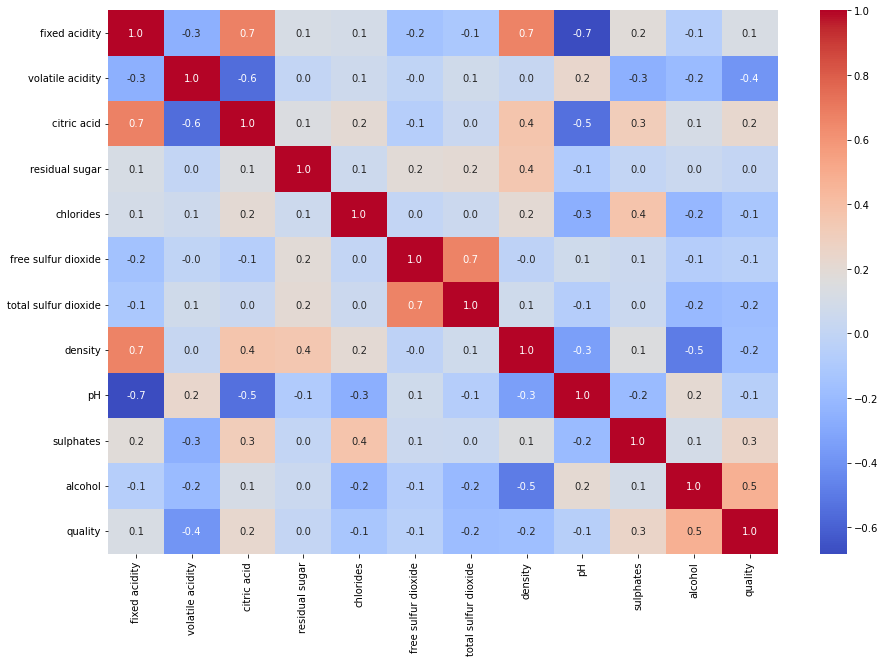

In [28]:
#Correlation Matrix 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.show()

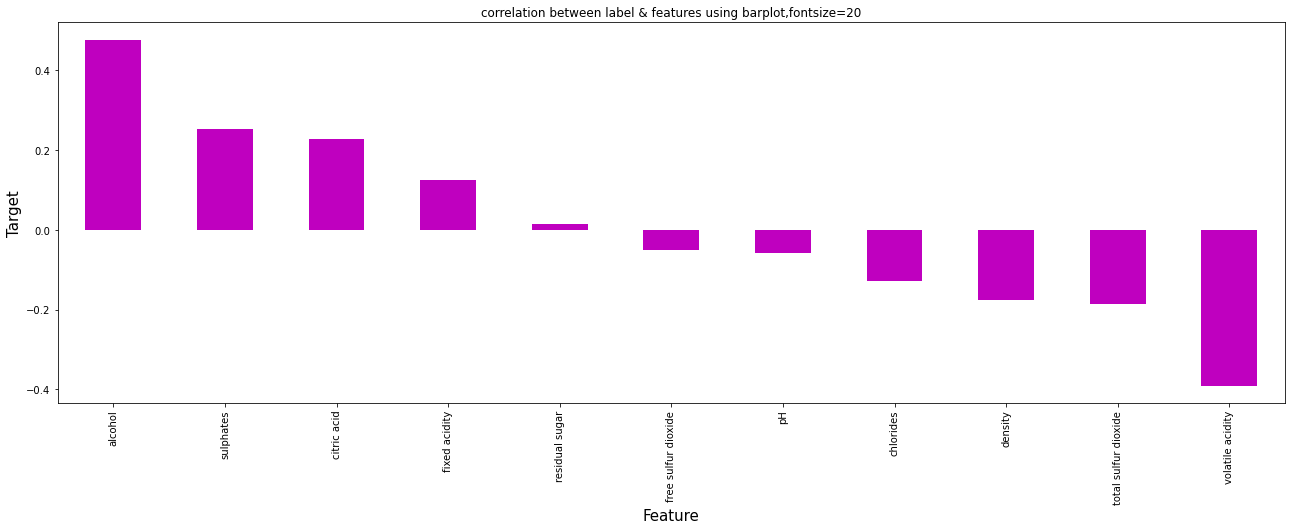

In [29]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

#Observation
-It is observed that alcohol,citric acid,sulphates,fixed acidity and residual sugar is positively correlation. 
-It is oservered that the pH,free sulphur dioxide, chlorides, total sulfur dioxide,density and the volatile acidity are found to have negative correlation.

In [30]:
#Binarization of the target value. 
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [31]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [32]:
df['quality'] = [1 if x>=7 else 0 for x in df['quality']] 

In [33]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [34]:
#is helps us to divide the data into two, i.e 0 or 1

In [35]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

0    1382
1     217
Name: quality, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

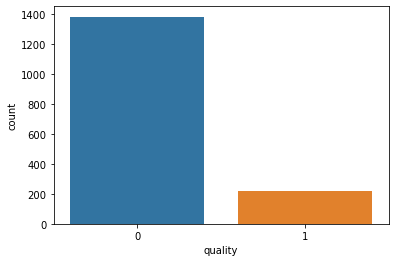

In [36]:
print(df['quality'].value_counts())
sns.countplot(df['quality'])
plt.show

It is oberved that the dataset is said to be imbalanced as one class has a high number of observation than 1. 

In [37]:
#Storing the feature matrix in x and the Target variable (quality in y)
x = df.drop('quality',axis=1)
y = df['quality']

In [38]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [39]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Dividing the dataset into two parts
1. training data set 
2. test data set

# Splitting the dataset into the training set and the test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

# Features Scaling 

In [41]:
st = StandardScaler()
X_train = st.fit_transform(X_train) 
X_test = st.transform(X_test)

In [42]:
X_train

array([[ 0.04751863,  0.51780717, -0.78163522, ...,  0.43461675,
         1.37243155,  1.30013194],
       [ 0.16306298,  0.6571397 , -0.11611654, ..., -0.20995053,
        -0.33957688, -0.39686531],
       [ 0.97187343, -0.98698413,  0.90775836, ..., -1.04788799,
        -1.34316803, -0.96253106],
       ...,
       [-0.5879753 ,  0.6850062 , -1.39596016, ...,  0.49907347,
        -1.10702894, -0.39686531],
       [-0.29911442,  0.01621007,  0.29343342, ..., -0.08103707,
        -0.33957688, -0.86825343],
       [ 0.39415168,  0.40634115,  0.08865844, ...,  0.17678984,
        -0.5166812 , -0.39686531]])

# Decision Tree Classifier 


In [43]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=dtc.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.9


In [46]:
Precision = precision_score(y_test, y_pred)
print(' Model Precision: ', Precision)

 Model Precision:  0.6818181818181818


In [47]:
from sklearn.metrics import roc_curve, auc


In [48]:
# Calculate the predicted probabilities for the positive class
y_prob = dtc.predict_proba(X_test)[:, 1]

In [49]:
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [50]:
# Calculate the AUC score
auc_score = auc(fpr, tpr)

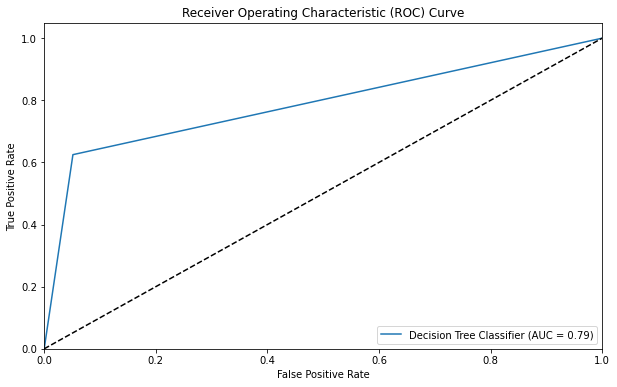

In [52]:
# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Decision Tree Classifier (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [53]:
#Displaying the dataframe of the model. 
pd.DataFrame({'Models':['DTC'],'ACC':[accuracy*100]})

,Models,ACC
0,DTC,90.0
